In [1]:
#import the libraries
from bs4 import BeautifulSoup 
import pandas as pd
import requests
import urllib.request
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create list to store the scraped data
authors = []
dates = []
statements = []
sources = []
targets = []

In [3]:
#create a function to scrape the website 
def scrape_website(page_number):
    page_num = str(page_number)
    URL = 'https://www.politifact.com/factchecks/list/?page='+page_num
    webpage = requests.get(URL)
    soup = BeautifulSoup(webpage.text, 'html.parser')

#Get the location of the information
    statement_footer = soup.find_all('footer', attrs={'class':'m-statement__footer'}) # location of the author and date
    statement_quote = soup.find_all('div', attrs={'class':'m-statement__quote'})#location of the statement
    statement_meta = soup.find_all('div', attrs={'class':'m-statement__meta'})#Location of the source
    target = soup.find_all('div', attrs={'class':'m-statement__meter'})#Location of the target score card

#loop through the statement footer
    for i in statement_footer:
        link1 = i.text.strip()
        name_and_date = link1.split()
        first_name = name_and_date[1]
        last_name = name_and_date[2]
        full_name = first_name+' '+last_name
        month = name_and_date[4]
        day = name_and_date[5]
        year = name_and_date[6]
        date = month+' '+day+' '+year
        dates.append(date)
        authors.append(full_name)
        
#loop through the statement quote
    for i in statement_quote:
        link2 = i.find_all('a')
        statement_text = link2[0].text.strip()
        statements.append(statement_text)
        
#loop through the meta
    for i in statement_meta:
        link3 = i.find_all('a')
        source_text = link3[0].text.strip()
        sources.append(source_text) 
        
#Loop through the target
    for i in target:
        link4 = i.find('div', attrs={'class':'c-image'}).find('img').get('alt')
        targets.append(link4)

In [4]:
#loop through n-1 web pages to scrap the data
n = 50
for i in range (1, n):
    scrape_website(i)
    time.sleep(2) 

In [5]:
#Create a dataframe
data = pd.DataFrame(columns = ['Author', 'Statement', 'Source', 'Date', 'Target'])
data['Author']= authors
data['Statement']=statements
data['Source']=sources
data['Date']=dates
data['Target']=targets

#show the data
data

,Author,Statement,Source,Date,Target
0,Tom Kertscher,"“Norway spends about $30,000 per child on earl...",Robert Reich,"December 10, 2021",mostly-true
1,Gabrielle Settles,"Deaths from vaccines have totaled 1,621 from J...",Instagram posts,"December 10, 2021",false
2,Luiz Romero,German chemist Andreas Noack was “assassinated...,Facebook posts,"December 10, 2021",false
3,Samantha Putterman,The COVID-19 vaccine is the “deadliest vaccine...,"Robert F. Kennedy, Jr.","December 10, 2021",pants-fire
4,Ciara O'Rourke,Warnings about heart problems and blood clots ...,Facebook posts,"December 10, 2021",false
...,...,...,...,...,...
1465,Monique Curet,Says Joe Biden has “allowed males to compete i...,Facebook posts,"February 2, 2021",false
1466,Ciara O'Rourke,Photo shows Rachel Levine’s family.,Viral image,"February 2, 2021",pants-fire
1467,Ciara O'Rourke,“Myanmar used Dominion Voting Systems.”,Facebook posts,"February 2, 2021",false
1468,Noah Y.,“Donald Trump is the first president in modern...,Donald Trump Jr.,"• February 2,",barely-true


In [6]:
#Create  function to get a binary number for target
def getBinaryNumTarget(text):
    if text == 'true':
        return 1
    else:
        return 0

In [7]:
#create a function to get a binary label true or false from the target
def getBinaryTarget(text):
    if text == 'true':
        return 'REAL'
    else:
        return 'FAKE'

In [8]:
#Create two new columns on the data frame
data['BinaryTarget']= data['Target'].apply(getBinaryTarget)
data['BinaryNumTarget']= data['Target'].apply(getBinaryNumTarget)

#Show data
data

,Author,Statement,Source,Date,Target,BinaryTarget,BinaryNumTarget
0,Tom Kertscher,"“Norway spends about $30,000 per child on earl...",Robert Reich,"December 10, 2021",mostly-true,FAKE,0
1,Gabrielle Settles,"Deaths from vaccines have totaled 1,621 from J...",Instagram posts,"December 10, 2021",false,FAKE,0
2,Luiz Romero,German chemist Andreas Noack was “assassinated...,Facebook posts,"December 10, 2021",false,FAKE,0
3,Samantha Putterman,The COVID-19 vaccine is the “deadliest vaccine...,"Robert F. Kennedy, Jr.","December 10, 2021",pants-fire,FAKE,0
4,Ciara O'Rourke,Warnings about heart problems and blood clots ...,Facebook posts,"December 10, 2021",false,FAKE,0
...,...,...,...,...,...,...,...
1465,Monique Curet,Says Joe Biden has “allowed males to compete i...,Facebook posts,"February 2, 2021",false,FAKE,0
1466,Ciara O'Rourke,Photo shows Rachel Levine’s family.,Viral image,"February 2, 2021",pants-fire,FAKE,0
1467,Ciara O'Rourke,“Myanmar used Dominion Voting Systems.”,Facebook posts,"February 2, 2021",false,FAKE,0
1468,Noah Y.,“Donald Trump is the first president in modern...,Donald Trump Jr.,"• February 2,",barely-true,FAKE,0


In [9]:
#Get the count of observations and Variable
data.shape

(1470, 7)

In [10]:
#View Last 5 variables
data.tail(5)

,Author,Statement,Source,Date,Target,BinaryTarget,BinaryNumTarget
1465,Monique Curet,Says Joe Biden has “allowed males to compete i...,Facebook posts,"February 2, 2021",false,FAKE,0
1466,Ciara O'Rourke,Photo shows Rachel Levine’s family.,Viral image,"February 2, 2021",pants-fire,FAKE,0
1467,Ciara O'Rourke,“Myanmar used Dominion Voting Systems.”,Facebook posts,"February 2, 2021",false,FAKE,0
1468,Noah Y.,“Donald Trump is the first president in modern...,Donald Trump Jr.,"• February 2,",barely-true,FAKE,0
1469,Chris Nichols,Facebook tried to “shut down” the campaign to ...,Bloggers,"February 2, 2021",false,FAKE,0


In [ ]:
#Drop any empty rows
data = data.dropna()

FAKE    1420
REAL      50
Name: BinaryTarget, dtype: int64


C:\Users\Dameesha Tharindi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-11-9da6b415ffcd>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


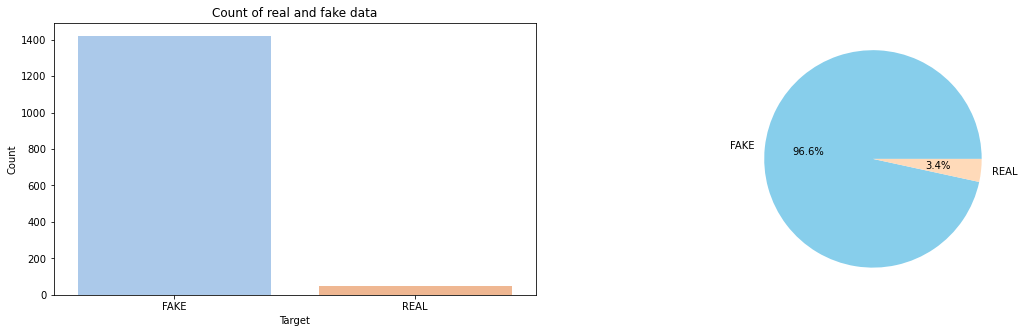

In [11]:
#Get the visuals of fake and real data
print(data["BinaryTarget"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data.BinaryTarget,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(data["BinaryTarget"].value_counts().values,explode=[0,0],labels=data.BinaryTarget.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

Facebook posts          425
Viral image             246
Instagram posts         126
Bloggers                 68
Joe Biden                38
                       ... 
Aubrey Huff               1
Eric Trump                1
House Republicans         1
Shelley Grogan            1
Michael van der Veen      1
Name: Source, Length: 316, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

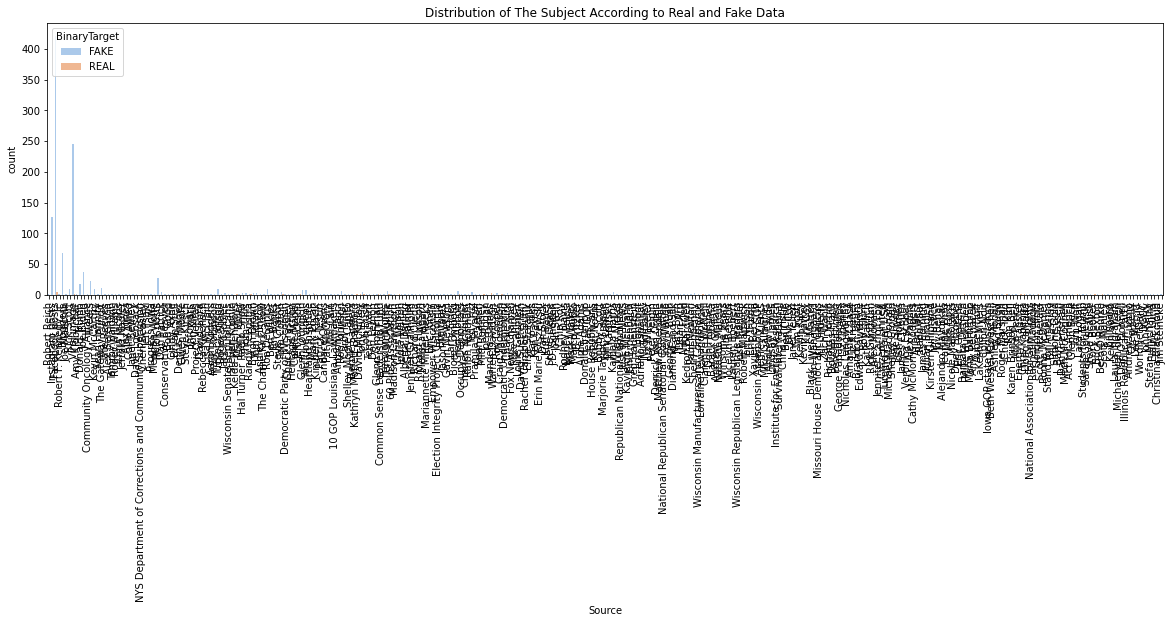

In [12]:
#Distribution of The Subject According to Real and Fake Data
print(data.Source.value_counts())
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)

ax = sns.countplot(x="Source",  hue='BinaryTarget', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [13]:
#Distribution according to Authors
print(data.Author.value_counts())

Ciara O'Rourke        297
Tom Kertscher         193
Samantha Putterman     84
Bill McCarthy          72
Louis Jacobson         70
                     ... 
Sudiksha Kochi          1
Raeanne Beckner         1
Emily Zirkelbach        1
Lara Bonatesta          1
Kelsey Harrell          1
Name: Author, Length: 78, dtype: int64


In [14]:
#Distributin according to Tagrets
print(data.Target.value_counts())

false          734
pants-fire     241
barely-true    222
half-true      136
mostly-true     77
true            50
full-flop        5
half-flip        4
no-flip          1
Name: Target, dtype: int64


In [15]:
#Install wordcloud
!pip3 install wordcloud

In [42]:
#Make the statement in to a list
data['Statement'].tolist()

['“norway spends about 30000 per child on early childhood care finland spends 23000 germany 18000” and the us 500',
 'deaths from vaccines have totaled 1621 from johnson  johnson 4799 from moderna 13039 from pfizer and 73 from unknown vaccines and this is an undercount because “only 1 of deaths are reported”',
 'german chemist andreas noack was “assassinated just hours after publishing the secret of the vax by government operatives”',
 'the covid19 vaccine is the “deadliest vaccine ever made”',
 'warnings about heart problems and blood clots in cold weather are to cover up covid19 vaccine side effects',
 '“hillary replaces kamala harris”',
 'canada joins the no jab no food trend',
 'the covid19 vaccines suppress the immune system and make people more susceptible to hiv shingles and herpes',
 'the united states had 589 coalfired plants 10 years ago and “were down to 504 … we are the only nation that has reduced our reliance on coal energy',
 'the build back better act “includes 345 bill

In [43]:
text = ' '.join(data['Statement'].tolist())

<function matplotlib.pyplot.show(close=None, block=None)>

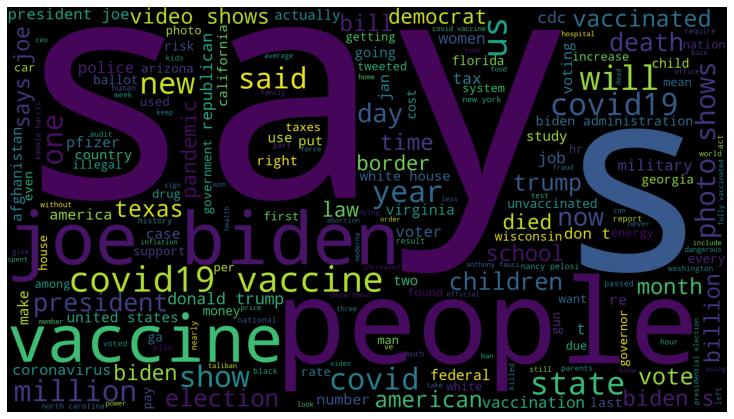

In [44]:
#Get the wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=1920,height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

In [16]:
#Convert text in to lower case
data['Statement'] = data['Statement'].apply(lambda x: x.lower())

In [17]:
#Display the data
display(data)

,Author,Statement,Source,Date,Target,BinaryTarget,BinaryNumTarget
0,Tom Kertscher,"“norway spends about $30,000 per child on earl...",Robert Reich,"December 10, 2021",mostly-true,FAKE,0
1,Gabrielle Settles,"deaths from vaccines have totaled 1,621 from j...",Instagram posts,"December 10, 2021",false,FAKE,0
2,Luiz Romero,german chemist andreas noack was “assassinated...,Facebook posts,"December 10, 2021",false,FAKE,0
3,Samantha Putterman,the covid-19 vaccine is the “deadliest vaccine...,"Robert F. Kennedy, Jr.","December 10, 2021",pants-fire,FAKE,0
4,Ciara O'Rourke,warnings about heart problems and blood clots ...,Facebook posts,"December 10, 2021",false,FAKE,0
...,...,...,...,...,...,...,...
1465,Monique Curet,says joe biden has “allowed males to compete i...,Facebook posts,"February 2, 2021",false,FAKE,0
1466,Ciara O'Rourke,photo shows rachel levine’s family.,Viral image,"February 2, 2021",pants-fire,FAKE,0
1467,Ciara O'Rourke,“myanmar used dominion voting systems.”,Facebook posts,"February 2, 2021",false,FAKE,0
1468,Noah Y.,“donald trump is the first president in modern...,Donald Trump Jr.,"• February 2,",barely-true,FAKE,0


In [18]:
#Remove punctuations
import string
def punctuation_removal(Statement):
    all_list = [char for char in Statement if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['Statement'] = data['Statement'].apply(punctuation_removal)

In [50]:
#Get Independent features
X= data[['Statement']]
display(X)

,Statement
0,“norway spends about 30000 per child on early ...
1,deaths from vaccines have totaled 1621 from jo...
2,german chemist andreas noack was “assassinated...
3,the covid19 vaccine is the “deadliest vaccine ...
4,warnings about heart problems and blood clots ...
...,...
1465,says joe biden has “allowed males to compete i...
1466,photo shows rachel levine’s family
1467,“myanmar used dominion voting systems”
1468,“donald trump is the first president in modern...


In [20]:
#Get Dependent Featutes
Y=data['BinaryNumTarget']
display(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: BinaryNumTarget, Length: 1470, dtype: int64

In [21]:
#Import CountVectorizer and TF_IDF Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [22]:
#Remove Stop words
#Do Stemming
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range (0, len(data)):
    review = re.sub('[^a-zA-Z]',' ', data['Statement'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
#View Harvested corpus
corpus

['norway spend per child earli childhood care finland spend germani us',
 'death vaccin total johnson johnson moderna pfizer unknown vaccin undercount death report',
 'german chemist andrea noack assassin hour publish secret vax govern oper',
 'covid vaccin deadliest vaccin ever made',
 'warn heart problem blood clot cold weather cover covid vaccin side effect',
 'hillari replac kamala harri',
 'canada join jab food trend',
 'covid vaccin suppress immun system make peopl suscept hiv shingl herp',
 'unit state coalfir plant year ago nation reduc relianc coal energi',
 'build back better act includ billion cut chariti care fund hospit',
 'societi choos blood clot heart problem cold flu symptom even symptom',
 'crew uss constitut consum gallon alcohol gallon water sevenmonth trip',
 'organ recoveri medic team pay tribut young femal organ donor photo',
 'toxic covidomicron time higher delta variant mortal rate also higher delta',
 'time carveout filibust',
 'ghislain maxwel codefend includ

In [75]:
# create the transform
vectorizer = TfidfVectorizer()

In [76]:
# tokenize and build vocab
vectorizer.fit(corpus)

TfidfVectorizer()

In [77]:
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'norway': 2116, 'spend': 2872, 'per': 2260, 'child': 528, 'earli': 936, 'childhood': 529, 'care': 465, 'finland': 1147, 'germani': 1264, 'us': 3240, 'death': 764, 'vaccin': 3257, 'total': 3112, 'johnson': 1632, 'moderna': 1992, 'pfizer': 2281, 'unknown': 3225, 'undercount': 3210, 'report': 2566, 'german': 1263, 'chemist': 521, 'andrea': 129, 'noack': 2098, 'assassin': 200, 'hour': 1451, 'publish': 2437, 'secret': 2712, 'vax': 3268, 'govern': 1305, 'oper': 2169, 'covid': 700, 'deadliest': 761, 'ever': 1030, 'made': 1822, 'warn': 3330, 'heart': 1386, 'problem': 2401, 'blood': 345, 'clot': 566, 'cold': 585, 'weather': 3345, 'cover': 698, 'side': 2784, 'effect': 950, 'hillari': 1416, 'replac': 2564, 'kamala': 1657, 'harri': 1370, 'canada': 443, 'join': 1633, 'jab': 1598, 'food': 1179, 'trend': 3148, 'suppress': 2976, 'immun': 1497, 'system': 3002, 'make': 1836, 'peopl': 2259, 'suscept': 2986, 'hiv': 1426, 'shingl': 2760, 'herp': 1404, 'unit': 3223, 'state': 2907, 'coalfir': 573, 'plant': 

In [78]:
# encode document
vector = vectorizer.transform([corpus[0]])

In [79]:
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 3440)
[[0. 0. 0. ... 0. 0. 0.]]


In [51]:
##Applying Countervectorizer
#Applying Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [52]:
#View Raws and Columns in X 
X.shape

(1470, 1000)

In [53]:
#Devide dataset in to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33,random_state=0)

In [54]:
#Get the features of words according to ngram
cv.get_feature_names()[:20]

['abl',
 'abort',
 'absente',
 'absente ballot',
 'account',
 'across',
 'act',
 'actor',
 'actual',
 'ad',
 'administr',
 'admit',
 'adult',
 'affect',
 'afghan',
 'afghanistan',
 'age',
 'agent',
 'ago',
 'ahead']

In [55]:
#Analysing the countvectorizer 
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [56]:
#Count Vectorizer Identification 
count_data = pd.DataFrame(X_train,columns=cv.get_feature_names())
count_data.head()

,abl,abort,absente,absente ballot,account,across,act,actor,actual,ad,...,would,wrote,year,year ago,yearold,yet,york,young,young peopl,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##MultinomialNB Algorythm

In [58]:
#Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [59]:
#Import relavent tools
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.938
Confusion matrix, without normalization


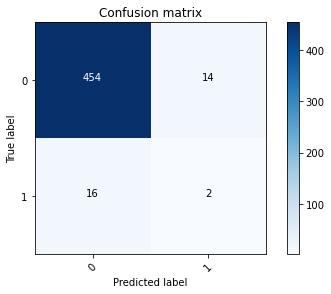

In [73]:
#Proceed to the classifier 
classifier.fit(X_train,Y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test,pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm, classes = ['0','1'])

In [ ]:
##Passive Aggressive Classifier Algorithm

In [61]:
#Import PAC
from sklearn.linear_model import PassiveAggressiveClassifier
import itertools
linear_clf = PassiveAggressiveClassifier(max_iter=50)

Accuracy: 0.949
Confusion matrix, without normalization


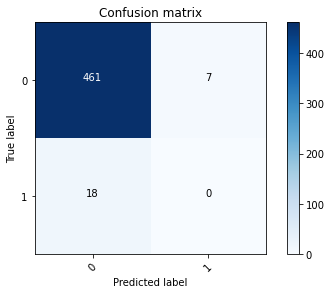

In [74]:
#Proceed to the classifier 
linear_clf.fit(X_train,Y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(Y_test,pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm, classes=['0','1'])

In [ ]:
##Multinormial Classifier with hyperparameter

In [63]:
#Identify the classifier
classifier = MultinomialNB(alpha=0.1)

In [64]:
#Analyse the hyper parameter 
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,Y_train)
    Y_pred = sub_classifier.predict(X_test)
    score = score = metrics.accuracy_score(Y_test,Y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print("Alpha: {}, score : {}".format(alpha,score))

Alpha: 0.0, score : 0.9629629629629629
Alpha: 0.1, score : 0.9300411522633745
Alpha: 0.2, score : 0.9259259259259259
Alpha: 0.30000000000000004, score : 0.9300411522633745
Alpha: 0.4, score : 0.9300411522633745
Alpha: 0.5, score : 0.9300411522633745
Alpha: 0.6000000000000001, score : 0.9362139917695473
Alpha: 0.7000000000000001, score : 0.934156378600823
Alpha: 0.8, score : 0.9382716049382716
Alpha: 0.9, score : 0.9382716049382716


C:\Users\Dameesha Tharindi\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [65]:
#Get Feature names
feature_names = cv.get_feature_names()

In [66]:
#
classifier.coef_[0]

C:\Users\Dameesha Tharindi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-7.16926448, -5.99919322, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -5.99919322, -7.16926448, -7.16926448, -7.16926448,
       -5.99919322, -7.16926448, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -7.16926448, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -7.16926448, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -7.16926448, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -7.16926448, -7.16926448, -5.99919322, -7.16926448,
       -6.42205008, -6.42205008, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -7.16926448, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -7.16926448, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -7.16926448, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -7.16926448, -7.16926448, -7.16926448, -7.16926448,
       -7.16926448, -7.16926448, -5.70292741, -6.42205008, -7.16926448,
       -6.42205008, -6.42205008, -7.16926448, -7.16926448, -7.16

In [67]:
#Most Real words
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.132382549868854, 'state'),
 (-5.474668756355487, 'year'),
 (-5.474668756355487, 'us'),
 (-5.474668756355487, 'sinc'),
 (-5.474668756355487, 'open'),
 (-5.474668756355487, 'new'),
 (-5.474668756355487, 'job open'),
 (-5.474668756355487, 'job'),
 (-5.474668756355487, 'feder'),
 (-5.702927408336468, 'virginia'),
 (-5.702927408336468, 'twice'),
 (-5.702927408336468, 'peopl'),
 (-5.702927408336468, 'pay'),
 (-5.702927408336468, 'pandem'),
 (-5.702927408336468, 'law'),
 (-5.702927408336468, 'last'),
 (-5.702927408336468, 'death'),
 (-5.702927408336468, 'budget'),
 (-5.702927408336468, 'averag'),
 (-5.99919322447964, 'work')]

In [68]:
#Most fake words
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-7.169264477129894, 'abl'),
 (-7.169264477129894, 'absente'),
 (-7.169264477129894, 'absente ballot'),
 (-7.169264477129894, 'account'),
 (-7.169264477129894, 'across'),
 (-7.169264477129894, 'actor'),
 (-7.169264477129894, 'actual'),
 (-7.169264477129894, 'ad'),
 (-7.169264477129894, 'admit'),
 (-7.169264477129894, 'adult'),
 (-7.169264477129894, 'affect'),
 (-7.169264477129894, 'afghan'),
 (-7.169264477129894, 'afghanistan'),
 (-7.169264477129894, 'age'),
 (-7.169264477129894, 'agent'),
 (-7.169264477129894, 'ago'),
 (-7.169264477129894, 'ahead'),
 (-7.169264477129894, 'aid'),
 (-7.169264477129894, 'air'),
 (-7.169264477129894, 'air forc')]